<a href="https://colab.research.google.com/github/Jakom001/Learning-Data-Science/blob/main/20_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

Random forest is just a bunch of Decision Trees budle together. 

Loading Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading data

In [ ]:
red_wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

Understanding the data

In [ ]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Plot the target variable

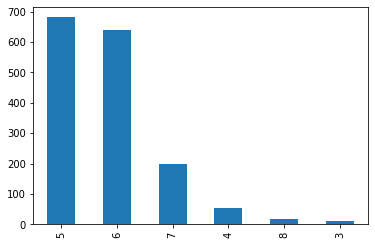

In [ ]:
red_wine_data.quality.value_counts().plot(kind = 'bar')

input variables

In [ ]:
X = red_wine_data.drop('quality', axis=1)

Target Variable

In [ ]:
y = red_wine_data.quality

Splitting the data into Train and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Building a Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
red_model = RandomForestClassifier()

# Fit the model
red_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#predict
y_pred = red_model.predict(X_test)

Let's compare y_test(actual values) and the predicted value for X_test by our log_model.

In [ ]:
y_test.values

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [ ]:
y_pred

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 7, 5, 5, 6,
       5, 6, 6, 6, 7, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 7, 6,
       7, 6, 7, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 7, 5, 7, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 7, 6, 5, 6, 5,
       7, 5, 7, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 7, 6, 7, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5,
       6, 5, 6, 7, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 7, 5, 7, 6,
       6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 7, 5, 5, 6, 5, 6, 6, 5, 5, 6,
       5, 7, 5, 5, 6, 5, 7, 5, 5, 6, 5, 7, 8, 5, 5, 6, 6, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 5, 5, 7, 6, 5, 7, 5, 6, 6, 5, 5, 5,
       6, 7, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 7, 7, 6, 7, 5, 5, 5, 5, 7,
       5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 7, 6, 6, 5,

Model Performance

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,  11,   6,   0,   0],
       [  0,   0, 153,  41,   1,   0],
       [  0,   0,  46, 139,  15,   0],
       [  0,   0,   0,  34,  26,   1],
       [  0,   0,   0,   1,   4,   1]])

Text(87.0, 0.5, 'Actual Values')

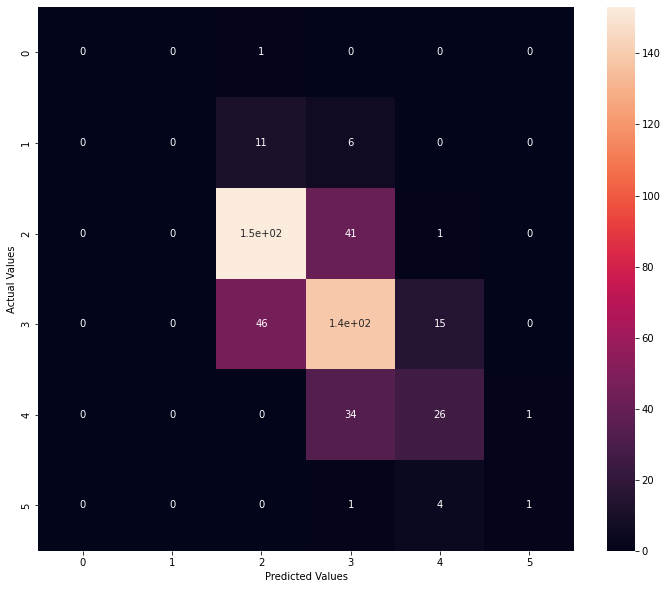

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

Accuracy

In [39]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.6645833333333333
